# KNN Algorithm

In [1]:
#imports
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from scipy import stats
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,cohen_kappa_score

In [2]:
iris = load_iris()
features = pd.DataFrame(iris.data,columns=iris.feature_names)
target = pd.DataFrame(iris.target,columns=['target'])
df = pd.concat([features,target],axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
x = iris.data
y = iris.target
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.5,random_state=0)

<BarContainer object of 4 artists>

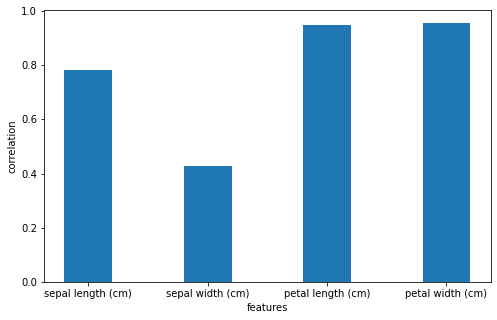

In [5]:
corrs = []
for x in features:
    corrs.append(abs(df['target'].corr(df[x])))
plt.figure(figsize=(8,5))    
plt.xticks(np.arange(len(corrs)),features)
plt.ylabel('correlation')
plt.xlabel('features')
plt.bar(np.arange(len(corrs)),corrs, width=0.4)

In [15]:
#KNN function for one new data point
def knn(x_train,y_train,x_test,k=5):
    score=[]
    for loop in zip(x_train,y_train):
        score.append([distance.euclidean(x_test,loop[0]),loop[1]])
    score.sort(key = lambda x : x[0])
    score = np.array(score)
    return int(stats.mode(score[:k,1])[0])    

In [16]:
#Implimenting KNN function for whole testing list
pred = []
for x in xtest:
    pred.append(knn(xtrain,ytrain,x,k=5))
pred = np.array(pred)

In [18]:
#Scores
print('accuracy: ',accuracy_score(ytest,pred))
print('precision: ',precision_score(ytest,pred,average='micro'))
print('recall: ',recall_score(ytest,pred,average='micro'))
print('f1: ',f1_score(ytest,pred,average='micro'))
print('cohen kappa: ',cohen_kappa_score(ytest,pred))

accuracy:  0.9466666666666667
precision:  0.9466666666666667
recall:  0.9466666666666667
f1:  0.9466666666666667
cohen kappa:  0.9188311688311688


<BarContainer object of 5 artists>

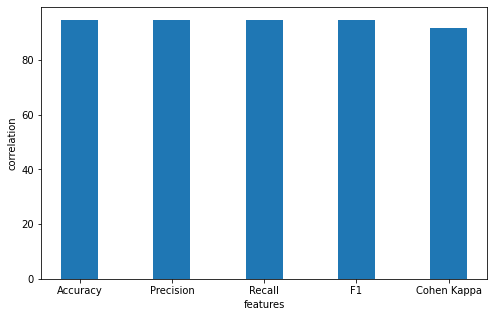

In [19]:
vals  = np.array([accuracy_score(ytest,pred),precision_score(ytest,pred,average='micro'),recall_score(ytest,pred,average='micro'),f1_score(ytest,pred,average='micro'),cohen_kappa_score(ytest,pred)])*100
plt.figure(figsize=(8,5))    
plt.xticks(np.arange(5),['Accuracy','Precision','Recall','F1','Cohen Kappa'])
plt.ylabel('correlation')
plt.xlabel('features')
plt.bar(np.arange(5),vals, width=0.4)